# Alternate interpretation for Testpulse to Charge in electrons
## Based on ThresholdCalib_2025-12-04_15-06-15.pdf

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [33]:
#Model for linear fit
def linear_mod(x, co, m):
    return co + m*x

[1872.65917603 3043.07116105 4213.48314607 5383.89513109]


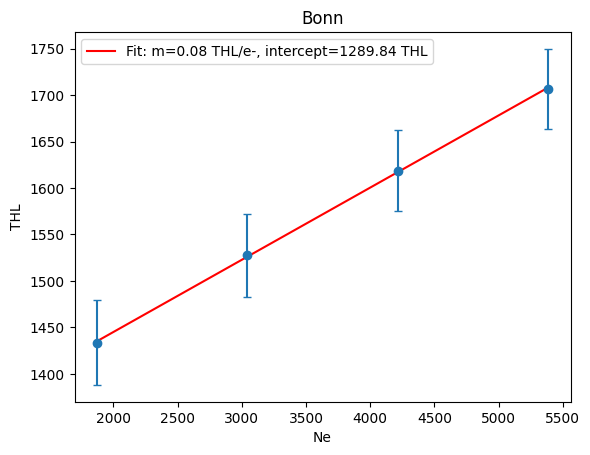

In [52]:
th_mean = np.array([1433.75, 1527.53, 1618.50, 1706.54])
th_er = np.array([45.54, 44.23, 43.51, 43.03])
vtpC = 100
ntp = 4
vtpF_step = 2.5e-3 #Step of vtpF DAC #! This is 2.5 mV as per Bonn, 0.5 mV as per our observation
vtpF = 240 + (100//ntp)*np.arange(ntp)
vtp = (vtpF - vtpC*2)*vtpF_step #Each VtpF DAC in mV
c = 3e-15 #Test capacitance in Farads
e = 1.602e-19 #Electron charge in Coloumb
Ne_vtp = vtp*c/e #Number of electrons at each vtp
print(Ne_vtp)

popt,pcov = curve_fit(linear_mod, Ne_vtp, th_mean, sigma=th_er)
plt.errorbar(Ne_vtp, th_mean, th_er, fmt='o', capsize=3)
plt.plot(Ne_vtp, linear_mod(Ne_vtp, *popt), c='r', label='Fit: m=%.2f THL/e-, intercept=%.2f THL'%(popt[1],popt[0]))
plt.title('Bonn'); plt.xlabel('Ne'); plt.ylabel('THL')
plt.legend()

[ 374.53183521  608.61423221  842.69662921 1076.77902622]


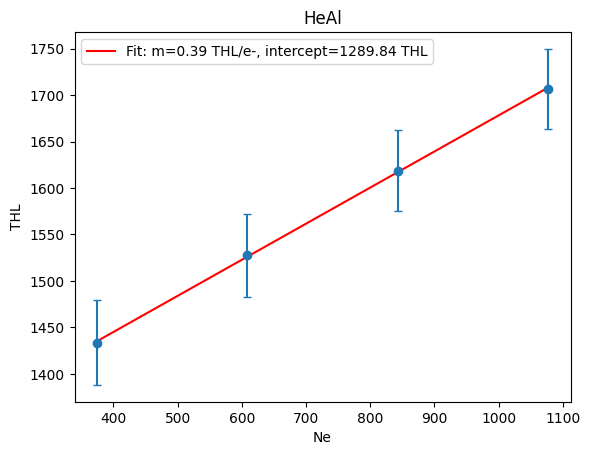

In [54]:
th_mean = np.array([1433.75, 1527.53, 1618.50, 1706.54])
th_er = np.array([45.54, 44.23, 43.51, 43.03])
vtpC = 100
ntp = 4
vtpF_step = 0.5e-3 #Step of vtpF DAC #! This is 2.5 mV as per Bonn, 0.5 mV as per our observation
vtpF = 240 + (100//ntp)*np.arange(ntp)
vtp = (vtpF - vtpC*2)*vtpF_step #Each VtpF DAC in mV
c = 3e-15 #Test capacitance in Farads
e = 1.602e-19 #Electron charge in Coloumb
Ne_vtp = vtp*c/e #Number of electrons at each vtp
print(Ne_vtp)

popt,pcov = curve_fit(linear_mod, Ne_vtp, th_mean, sigma=th_er)
plt.errorbar(Ne_vtp, th_mean, th_er, fmt='o', capsize=3)
plt.plot(Ne_vtp, linear_mod(Ne_vtp, *popt), c='r', label='Fit: m=%.2f THL/e-, intercept=%.2f THL'%(popt[1],popt[0]))
plt.title('HeAl'); plt.xlabel('Ne'); plt.ylabel('THL')
plt.legend()

In [65]:
#Compute Test pulse amplitude for required number of electrons

Ne = 200
Ne = 1000
vtp_V_req = Ne*e/c #in Volts
vtpF_step = 0.5e-3 #Step of vtpF DAC #! This is 0.5 mV as per our observation
vtpF_abs = vtp_V_req/vtpF_step
vtpC = 100 #! Change this as per DAC setting
vtpF = vtpF_abs + vtpC*2
print('For %d electrons, required VtpF DAC is %.2f for VtpC DAC %d'%(Ne, vtpF, vtpC))
print('Expected threshold from HeAl fit is %.2f THL'%(linear_mod(Ne, *popt)))

For 1000 electrons, required VtpF DAC is 306.80 for VtpC DAC 100
Expected threshold from HeAl fit is 1678.12 THL


In [70]:
#Estimate VtpF ranges for TOT calibration
vtpC = 100
Ne_min = 200
Ne_max = 4000
vtpF_step = 0.5e-3 #Step of vtpF
vtp_min = Ne_min*e/c #in Volts
vtp_max = Ne_max*e/c #in Volts
vtpF_min = vtp_min/vtpF_step + vtpC*2
vtpF_max = vtp_max/vtpF_step + vtpC*2
print('For TOT calibration from %d to %d electrons, VtpF DAC range is %.2f to %.2f for VtpC DAC %d'%(Ne_min, Ne_max, vtpF_min, vtpF_max, vtpC))
print('Expected threshold from HeAl fit is %.2f to %.2f THL'%(linear_mod(Ne_min, *popt), linear_mod(Ne_max, *popt)))

For TOT calibration from 200 to 4000 electrons, VtpF DAC range is 221.36 to 627.20 for VtpC DAC 100
Expected threshold from HeAl fit is 1367.49 to 2842.96 THL


In [71]:
#THL to electrons conversion using HeAl fit
thl = 1343
ne_est = (thl - popt[0])/popt[1]
print('For THL = %d, estimated number of electrons is %.2f e-'%(thl, ne_est))

For THL = 1343, estimated number of electrons is 136.92 e-
